# Información

Esta práctica está basada en una similar desarrollada por David Casillas en Matlab para la asignatura de Procesamiento de Señales.

In [1]:
dum = 0;

# Construcción del entorno

In [2]:
# #import Pkg; #Pkg.add("Dummies")#Los paquetes en Julia se suelen nombrar en plural
# import Pkg; Pkg.add("Images")
# Pkg.add("TestImages")
# Pkg.add("ImageView")
# Pkg.add("QuartzImageIO")#For some reason, this dependency for ImageIO.jl is not pulled with the rest
using Images, TestImages
using StatsBase
using Plots

   Resolving package versions...


  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Project.toml`
  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Project.toml`
  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Project.toml`
  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Project.toml`
  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Manifest.toml`


Recuerda ajustar el directorio de trabajo para que existan las imagenes que van a ser usadas.

# Solución

## Recordatorio de prácticas pasadas y Preparación

1. Carga la image "board_recorte" y muéstrala

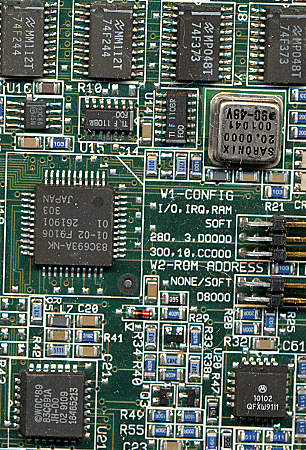

In [3]:

img1 = load("Board_Recorte.tif")

2. Separa los canales  de color RGB y muestrelos en una imagen 1x3

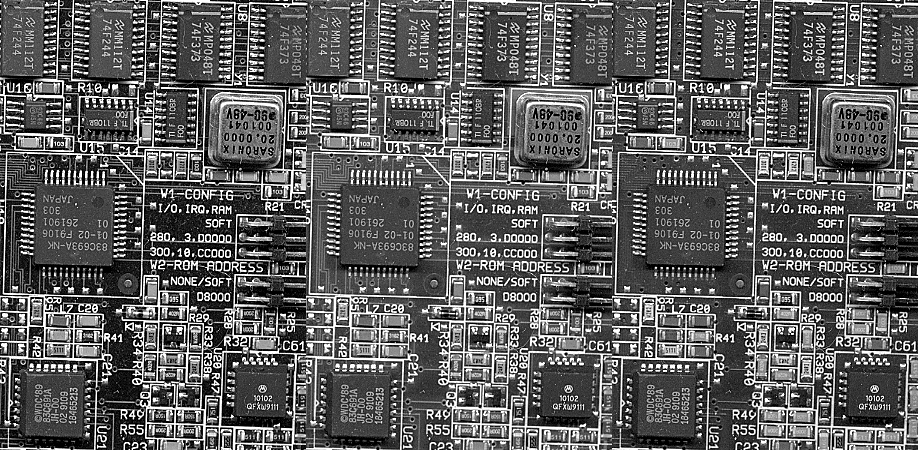

In [4]:
img1_r = red.(img1)
img1_v = green.(img1)
img1_a = blue.(img1)

img1_R = RGB.(img1_r)
img1_G = RGB.(img1_v)
img1_B = RGB.(img1_a)

mosaicview(img1_R, img1_G, img1_B, nrow=1)


3. Convierte la imagen RGB en HSI y represente cada canal en una imagen de 1x3


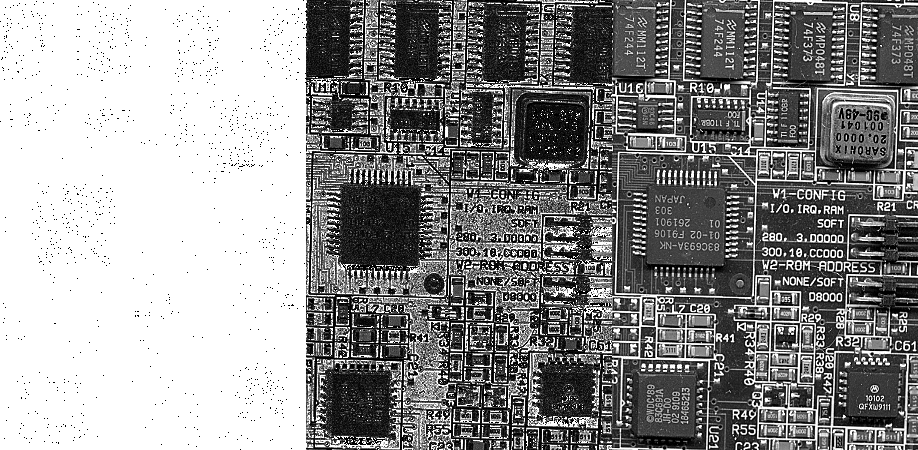

In [5]:
img1_HSI = HSI.(img1)

channels = channelview(float.(img1_HSI))
img1_H = RGB.(channels[1,:,:])
img1_S = RGB.(channels[2,:,:])
img1_I = RGB.(channels[3,:,:])

mosaicview(img1_H, img1_S, img1_I; nrow=1)

4. Halla el negativo del canal de saturación en "img1_SNeg" y muestra tanto 
el negativo como su histograma en una imagen

In [6]:
img1_SNeg = 1.0f0 .- img1_S

mosaicview(RGB.(img1_SNeg),img1_S; nrow=1)

hist1_SNeg = histogram(vec(reinterpret(UInt8, img1_SNeg)));
plot!( plot(RGB.(img1_SNeg)), hist1_SNeg,
    layout = (1,2),
    legend=false, 
    reuse=false
)

MethodError: MethodError: no method matching -(::Float32, ::RGB{Float32})
Math on colors is deliberately undefined in ColorTypes, but see the ColorVectorSpace package.

Closest candidates are:
  -(::Union{Float16, Float32, Float64})
   @ Base float.jl:406
  -(::T, !Matched::T) where T<:Union{Float16, Float32, Float64}
   @ Base float.jl:409
  -(::Union{Float16, Float32, Float64}, !Matched::BigFloat)
   @ Base mpfr.jl:474
  ...


5. Umbraliza "img1_SNeg" con un nivel obtenido por el método de Otsu, almacena el resultado en "imgB" y 
muéstrala.

In [7]:
# vamos a obtener el mejor valor para umbralizar a traves de otsu

img1_SNeg_g = Gray.(img1_SNeg)
edges, counts = HistogramThresholding.build_histogram(img1_SNeg_g, 256)

t = HistogramThresholding.find_threshold(counts[1:end], edges, Otsu())
print("Umbral Otsu es $t.")

UndefVarError: UndefVarError: `img1_SNeg` not defined

In [8]:
using ImageContrastAdjustment
using HistogramThresholding
using ImageSegmentation

imgB = img1_SNeg_g .>= t

mosaicview(img1_SNeg_g, RGB.(imgB), nrow=1)


UndefVarError: UndefVarError: `img1_SNeg_g` not defined

6. Filtra la imagen imgB con un filtro de mediana 5x5 y compara el resultado.

In [9]:
B = mapwindow(median!, imgB, (5, 5))
mosaicview(img1,B,img1_SNeg,nrow=1)

UndefVarError: UndefVarError: `imgB` not defined

# Procesado Morfológico

In [10]:
using ImageMorphology
using IndirectArrays

La implementación de las operaciones morfológicas en este paquete convolucionan
con un elemento estructurante predefinido que es, en 2D un elemento lleno de 1.0
de dimensiones 3 x 3. 

Para hacer el filtrado convolutivo habría que ejecutar imfilter con otras operaciones
1. Define un elemento estructurante  cuadrado *centrado* de tamaño 5x5 con la función "strel"

In [11]:
# Structuring element

# Crear la matriz booleana para el elemento de estructuración 5x5 centrado
se_mask = centered(Bool[1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1])

# Generar el elemento de estructuración usando la función strel
se_offsets = strel(CartesianIndex, se_mask)
se = strel(Bool, se_offsets)

5×5 OffsetArray(::BitMatrix, -2:2, -2:2) with eltype Bool with indices -2:2×-2:2:
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1

2. Aplique una apertura a la imagen filtrada anterior "B" con el elemento estructurante anterior 
y representa la imagen resultante con un título "Opening". 

In [12]:
B_open = opening(B, se)
B_open = Gray.(B_open)
B = Gray.(B)
mosaicview(B, B_open, nrow=1)


UndefVarError: UndefVarError: `B` not defined

3. Lleva a cabo las operaciones de erosión, dilatación y cierre y representa los resultados lado a lado. 

In [13]:
B_erode = 
B_dilate = 
B_closed = 
mosaicview(B, B_open, B_closed, B_eroded, B_dilated, nrow=2)

UndefVarError: UndefVarError: `B` not defined

4. Compruebe que el cierre y la apertura son secuencia de dilataciones y erosiones.

In [14]:
B_open == dilate(erode(B, se), se)
B_closed == erode(dilate(B, se), se)

UndefVarError: UndefVarError: `B_open` not defined

# Segmentación

En esta parte de la práctica vamos a ver en detalle la segmentación 
"por divisoria" (ing. "watershed").

In [15]:
Pkg.add("ImageSegmentation")
using ImageSegmentation

   Resolving package versions...


  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Project.toml`
  No Changes to `~/Desktop/Universidad/CURSO-2023-2024/pdi/pdi-sessions/Manifest.toml`


Para ello vamos a segmentar en granos un corte de roca. Una tarea similar
sería segmentar un corte de tejido celular. 

1. Carga la imagen "GrainSizeAnalysis.jpg", pásala a tonos de gris, y visualizala.

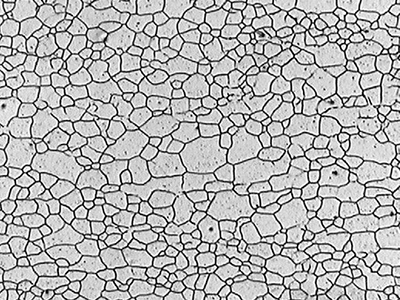

In [16]:
img2 = Gray.(load("GrainSizeAnalysis.jpg"))

3. Verifica si la imagen original se puede umbralizar de forma sencilla:

In [17]:
hist2 = dum

0

Comenta el resultado.

3. Usa el tipo de umbralización adecuado a la exploración anterior:

In [18]:
img2_bw = dum;
Gray.(img2_bw)

5. El proceso de la divisoria comienza encontrando puntos en blanco 
y sus distancias. Para eso se usa 
"feature_transform" y "distance transform.

In [19]:
bw_transform = feature_transform(img2_bw)
dist = 1 .- distance_transform(bw_transform)

MethodError: MethodError: no method matching feature_transform(::Int64)

Closest candidates are:
  feature_transform(::Any, !Matched::Any; kwargs...)
   @ ImageMorphology deprecated.jl:103
  feature_transform(!Matched::AbstractArray{<:Union{Bool, AbstractGray{Bool}}, N}; weights, nthreads) where N
   @ ImageMorphology ~/.julia/packages/ImageMorphology/zxdrG/src/feature_transform.jl:33


6.Ahora decidimos qué pertenece a cada "watershed". Lee y comprende el siguiente algoritmo. SI es necesario, mira las primitivas "watershed" y "label_map". 

In [20]:
dist_trans = dist .< 1
markers = label_components(dist_trans)
Gray.(markers/32.0)
segments = watershed(dist, markers)
labels = labels_map(segments)
colored_labels = IndirectArray(labels, distinguishable_colors(maximum(labels)))
masked_colored_labels = colored_labels .* (1 .- img2_bw)
mosaic(img2, colored_labels, masked_colored_labels; nrow=1)

UndefVarError: UndefVarError: `dist` not defined

Comenta el resultado. 

7. ¿Se te ocurre alguna idea para mejorar este resultado? exploración
tu solución.

In [21]:
#Construye tu solución siguiendo el ejemplo de arriba... 
mosaic(img2, my_colored_labels, my_masked_colored_labels; nrow=1)

UndefVarError: UndefVarError: `my_colored_labels` not defined

# Autoevaluación

En este último apartado, registre qué competencias ha entrenado en
esta práctica. 